<a href="https://colab.research.google.com/github/parasgulati8/People-Analytics/blob/master/People_Analytics_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import itertools
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

pd.options.display.max_columns = 100

## Import Data

In [0]:
data = pd.read_excel('drive/My Drive/Colab Notebooks/dataset/Health_Care_Data_train.xlsx')

In [147]:
data.head()

,Group,Specialty,physician,verysat,q1,q2,q3,q5,q6,q7,q9,q10,q11,q12,q13,q14,q16,q17,q18,q19,q20,q27,q34,q35,q37,q38,q45,q46,q47,q48,q50,q51,q53,q54,q55,q56,q57,q58
0,A,Other,1,0.0,5.0,2.0,2.0,4.0,1.0,5.0,5.0,4.0,5.0,5.0,3.0,4.0,3.0,2.0,2.0,2.0,2.0,5.0,1.0,3.0,4.0,4.0,1.0,5.0,2.0,2.0,3.0,3.0,5.0,5.0,5.0,3.0,3.0,3.0
1,A,Other,1,0.0,5.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,1.0,4.0,2.0,2.0,5.0,1.0,3.0,4.0,4.0,4.0,4.0,3.0,2.0,4.0,4.0,4.0,3.0,3.0,5.0,4.0,1.0,3.0,3.0,2.0
2,A,Other,1,0.0,5.0,5.0,4.0,4.0,4.0,3.0,5.0,4.0,4.0,5.0,3.0,5.0,4.0,4.0,5.0,3.0,3.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,4.0,4.0,2.0,3.0,2.0,3.0,3.0,5.0,3.0,2.0
3,A,Other,1,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,5.0,5.0,5.0,1.0
4,A,Primary_Care,1,0.0,3.0,1.0,1.0,2.0,1.0,3.0,4.0,1.0,4.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,4.0,3.0,1.0,4.0,1.0,5.0,3.0,3.0,5.0,5.0,1.0,3.0,1.0,3.0


In [0]:
data.describe()

,physician,verysat,q1,q2,q3,q5,q6,q7,q9,q10,q11,q12,q13,q14,q16,q17,q18,q19,q20,q27,q34,q35,q37,q38,q45,q46,q47,q48,q50,q51,q53,q54,q55,q56,q57,q58
count,1100.000000,1093.000000,1094.000000,1089.000000,1094.000000,1097.000000,1083.000000,1089.000000,1093.000000,1090.000000,1074.000000,1082.000000,1082.000000,1089.000000,1092.000000,1092.000000,1092.000000,1092.000000,1069.000000,1087.000000,1096.000000,1093.000000,1091.000000,1091.000000,1088.000000,1087.000000,1085.000000,1088.000000,1088.000000,1089.000000,1092.000000,1091.000000,1086.000000,1090.000000,1086.000000,1091.000000
mean,0.911818,0.288198,4.469835,3.425161,3.705667,3.710119,3.287165,4.173554,4.535224,3.675229,3.865922,4.222736,4.337338,3.703398,3.427656,3.601648,3.289377,3.065018,3.037418,4.382705,3.354015,3.886551,4.169569,3.766269,2.003676,3.956762,3.787097,4.144301,3.860294,3.943985,2.808608,2.766269,3.000921,3.676147,3.731123,1.876260
std,0.283688,0.453131,0.776192,1.297676,1.178189,1.202119,1.256293,0.979664,0.655977,1.038749,0.837547,0.844704,0.897046,1.293791,1.376537,1.277212,1.324713,1.324653,1.287546,0.796398,1.291575,1.017220,0.888060,1.045479,0.907895,0.899646,0.951702,0.847283,1.076967,0.924336,1.233878,1.198393,1.237285,0.998014,1.116895,1.030852
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,0.000000,4.000000,2.000000,3.000000,3.000000,2.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,4.000000,2.000000,4.000000,4.000000,3.000000,1.000000,4.000000,3.000000,4.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,1.000000
50%,1.000000,0.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,5.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,2.000000
75%,1.000000,1.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,5.000000,5.000000,2.000000,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,5.000000,2.000000
max,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Data Preprocessing

Three Approaches :
- Drop the rows with Null values
- Replace them with mean
- Replace them with Median

### Imputing the NaN with median values and non numeric values 

In [4]:
data.isna().sum()

Group         0
Specialty     0
physician     0
verysat       7
q1            6
q2           11
q3            6
q5            3
q6           17
q7           11
q9            7
q10          10
q11          26
q12          18
q13          18
q14          11
q16           8
q17           8
q18           8
q19           8
q20          31
q27          13
q34           4
q35           7
q37           9
q38           9
q45          12
q46          13
q47          15
q48          12
q50          12
q51          11
q53           8
q54           9
q55          14
q56          10
q57          14
q58           9
dtype: int64

In [0]:
indices = np.where(data['q58'].notna())

In [0]:
data = data.iloc[indices]

In [150]:
data.shape

(1091, 38)

In [0]:
from sklearn.impute import SimpleImputer

In [0]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

In [0]:
data.iloc[:,2:] = imp_median.fit_transform(data.iloc[:,2:])

In [89]:
data.columns

Index(['Group', 'Specialty', 'physician', 'verysat', 'q1', 'q2', 'q3', 'q5',
       'q6', 'q7', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q16', 'q17',
       'q18', 'q19', 'q20', 'q27', 'q34', 'q35', 'q37', 'q38', 'q45', 'q46',
       'q47', 'q48', 'q50', 'q51', 'q53', 'q54', 'q55', 'q56', 'q57', 'q58'],
      dtype='object')

In [0]:
temp = data.iloc[:, 4:-1]

In [0]:
new_cols = pd.DataFrame(temp.iloc[0].value_counts().sort_index()).T
for i in range(1,len(temp)):
  new_cols = pd.concat((new_cols, pd.DataFrame(temp.iloc[i].value_counts().sort_index()).T))

In [0]:
new_data = pd.concat((new_cols.fillna(0), data), axis=1)

In [90]:
new_data

,1.0,2.0,3.0,4.0,5.0,Group,Specialty,physician,verysat,q1,q2,q3,q5,q6,q7,q9,q10,q11,q12,q13,q14,q16,q17,q18,q19,q20,q27,q34,q35,q37,q38,q45,q46,q47,q48,q50,q51,q53,q54,q55,q56,q57,q58
0,3.0,8.0,7.0,5.0,10.0,A,Other,1.0,0.0,5.0,2.0,2.0,4.0,1.0,5.0,5.0,4.0,5.0,5.0,3.0,4.0,3.0,2.0,2.0,2.0,2.0,5.0,1.0,3.0,4.0,4.0,1.0,5.0,2.0,2.0,3.0,3.0,5.0,5.0,5.0,3.0,3.0,3.0
1,3.0,3.0,6.0,16.0,5.0,A,Other,1.0,0.0,5.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,1.0,4.0,2.0,2.0,5.0,1.0,3.0,4.0,4.0,4.0,4.0,3.0,2.0,4.0,4.0,4.0,3.0,3.0,5.0,4.0,1.0,3.0,3.0,2.0
2,0.0,4.0,10.0,11.0,8.0,A,Other,1.0,0.0,5.0,5.0,4.0,4.0,4.0,3.0,5.0,4.0,4.0,5.0,3.0,5.0,4.0,4.0,5.0,3.0,3.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,4.0,4.0,2.0,3.0,2.0,3.0,3.0,5.0,3.0,2.0
3,3.0,0.0,0.0,0.0,30.0,A,Other,1.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,5.0,5.0,5.0,1.0
4,16.0,1.0,9.0,4.0,3.0,A,Primary_Care,1.0,0.0,3.0,1.0,1.0,2.0,1.0,3.0,4.0,1.0,4.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,4.0,3.0,1.0,4.0,1.0,5.0,3.0,3.0,5.0,5.0,1.0,3.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,2.0,1.0,0.0,6.0,24.0,H,Specialist,1.0,1.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,5.0,5.0,5.0,2.0
1096,0.0,3.0,18.0,11.0,1.0,H,Surgical,1.0,0.0,5.0,4.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,3.0,2.0,3.0,3.0,4.0,2.0
1097,3.0,0.0,0.0,0.0,30.0,H,Surgical,1.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,5.0,5.0,5.0,1.0
1098,0.0,2.0,5.0,16.0,10.0,H,Surgical,1.0,0.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,4.0,2.0,4.0,5.0,5.0,3.0,3.0,2.0,3.0,3.0,3.0,4.0,2.0


### Using K fold Cross Validation

In [0]:
def get_folds(X,y, k=5):
    return list(StratifiedKFold(n_splits=k, shuffle=True, random_state=1).split(X, y))

In [0]:
dummy = pd.get_dummies(data['Specialty'])
dummy1 = pd.get_dummies(data['Group'])

In [0]:
df = pd.concat([dummy, dummy1, new_data], axis = 1)

In [16]:
df.head()

,Non_MD,Other,Primary_Care,Specialist,Surgical,A,B,C,D,E,F,G,H,1.0,2.0,3.0,4.0,5.0,Group,Specialty,physician,verysat,q1,q2,q3,q5,q6,q7,q9,q10,q11,q12,q13,q14,q16,q17,q18,q19,q20,q27,q34,q35,q37,q38,q45,q46,q47,q48,q50,q51,q53,q54,q55,q56,q57,q58
0,0,1,0,0,0,1,0,0,0,0,0,0,0,3.0,8.0,7.0,5.0,10.0,A,Other,1.0,0.0,5.0,2.0,2.0,4.0,1.0,5.0,5.0,4.0,5.0,5.0,3.0,4.0,3.0,2.0,2.0,2.0,2.0,5.0,1.0,3.0,4.0,4.0,1.0,5.0,2.0,2.0,3.0,3.0,5.0,5.0,5.0,3.0,3.0,3.0
1,0,1,0,0,0,1,0,0,0,0,0,0,0,3.0,3.0,6.0,16.0,5.0,A,Other,1.0,0.0,5.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,1.0,4.0,2.0,2.0,5.0,1.0,3.0,4.0,4.0,4.0,4.0,3.0,2.0,4.0,4.0,4.0,3.0,3.0,5.0,4.0,1.0,3.0,3.0,2.0
2,0,1,0,0,0,1,0,0,0,0,0,0,0,0.0,4.0,10.0,11.0,8.0,A,Other,1.0,0.0,5.0,5.0,4.0,4.0,4.0,3.0,5.0,4.0,4.0,5.0,3.0,5.0,4.0,4.0,5.0,3.0,3.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,4.0,4.0,2.0,3.0,2.0,3.0,3.0,5.0,3.0,2.0
3,0,1,0,0,0,1,0,0,0,0,0,0,0,3.0,0.0,0.0,0.0,30.0,A,Other,1.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,5.0,5.0,5.0,1.0
4,0,0,1,0,0,1,0,0,0,0,0,0,0,16.0,1.0,9.0,4.0,3.0,A,Primary_Care,1.0,0.0,3.0,1.0,1.0,2.0,1.0,3.0,4.0,1.0,4.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,4.0,3.0,1.0,4.0,1.0,5.0,3.0,3.0,5.0,5.0,1.0,3.0,1.0,3.0


In [0]:
df = df.drop(columns=['Group', 'Specialty'], axis=1)

In [0]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [0]:
folds = get_folds(X, y)

### Scaling the data

In [0]:
df.head()

,Non_MD,Other,Primary_Care,Specialist,Surgical,A,B,C,D,E,F,G,H,physician,verysat,q1,q2,q3,q5,q6,q7,q9,q10,q11,q12,q13,q14,q16,q17,q18,q19,q20,q27,q34,q35,q37,q38,q45,q46,q47,q48,q50,q51,q53,q54,q55,q56,q57,q58
0,0,1,0,0,0,1,0,0,0,0,0,0,0,1.0,0.0,5.0,2.0,2.0,4.0,1.0,5.0,5.0,4.0,5.0,5.0,3.0,4.0,3.0,2.0,2.0,2.0,2.0,5.0,1.0,3.0,4.0,4.0,1.0,5.0,2.0,2.0,3.0,3.0,5.0,5.0,5.0,3.0,3.0,3.0
1,0,1,0,0,0,1,0,0,0,0,0,0,0,1.0,0.0,5.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,1.0,4.0,2.0,2.0,5.0,1.0,3.0,4.0,4.0,4.0,4.0,3.0,2.0,4.0,4.0,4.0,3.0,3.0,5.0,4.0,1.0,3.0,3.0,2.0
2,0,1,0,0,0,1,0,0,0,0,0,0,0,1.0,0.0,5.0,5.0,4.0,4.0,4.0,3.0,5.0,4.0,4.0,5.0,3.0,5.0,4.0,4.0,5.0,3.0,3.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,4.0,4.0,2.0,3.0,2.0,3.0,3.0,5.0,3.0,2.0
3,0,1,0,0,0,1,0,0,0,0,0,0,0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,5.0,5.0,5.0,1.0
4,0,0,1,0,0,1,0,0,0,0,0,0,0,1.0,0.0,3.0,1.0,1.0,2.0,1.0,3.0,4.0,1.0,4.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,4.0,3.0,1.0,4.0,1.0,5.0,3.0,3.0,5.0,5.0,1.0,3.0,1.0,3.0


In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
X_train, X_test, y_train, y_test = [], [], [], []

for fold in folds:
  X_train.append(X.values[fold[0]])
  X_test.append(X.values[fold[1]])
  y_train.append(y.values[fold[0]])
  y_test.append(y.values[fold[1]])
                 

In [0]:
fold = folds[0]
X_train, X_test, y_train, y_test = X.values[fold[0]], X.values[fold[1]], y.values[fold[0]], y.values[fold[1]]

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### How many unique elements in Specialty and Group Column

In [0]:
np.unique(data['Specialty'])

array(['Non_MD', 'Other', 'Primary_Care', 'Specialist', 'Surgical'],
      dtype=object)

In [0]:
np.unique(data1['Group'])

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], dtype=object)

In [0]:
np.unique(data1['q58'])

array([1., 2., 3., 4., 5.])

# KNN

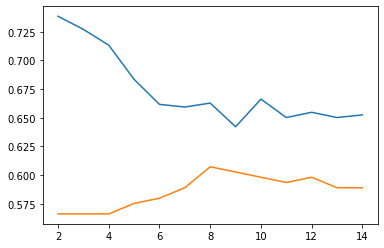

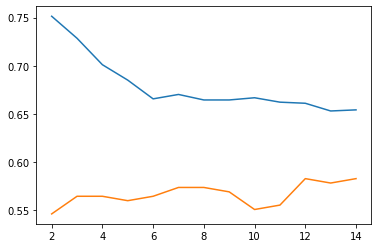

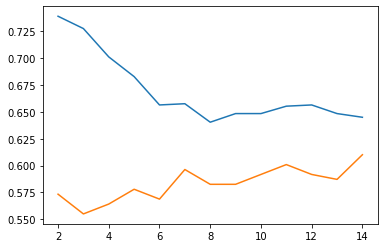

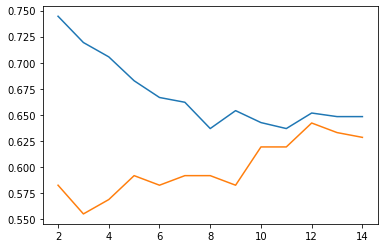

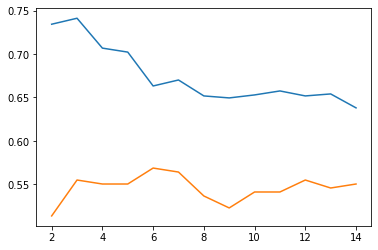

In [186]:
for fold in folds:
    X_train, X_test, y_train, y_test = X.iloc[fold[0], :], X.iloc[fold[1], :], y.iloc[fold[0]], y.iloc[fold[1]]
    
    acc = []
    acc_test = []
    for i in range(2,15):
        knn = KNeighborsClassifier(i)
        knn.fit(X_train, y_train)
        acc.append(accuracy_score(y_train, knn.predict(X_train)))
        acc_test.append(accuracy_score(y_test, knn.predict(X_test)))
        
    plt.figure()
    plt.plot(range(2,15), acc)
    plt.plot(range(2,15), acc_test)
    plt.show()

In [0]:
data1 = data.dropna()

In [0]:
data1.describe()

In [0]:
def plotCorrelationMatrix(df, graphWidth):
    filename = 'People Analytics'
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [0]:
plotCorrelationMatrix(data1, 15)

In [0]:
data1.shape

(911, 38)

# Random Forest 

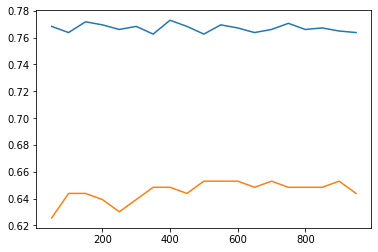

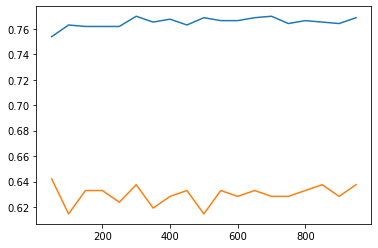

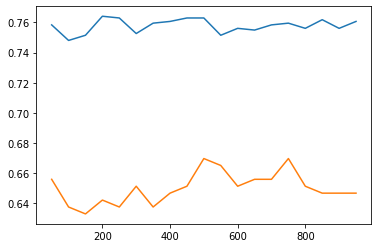

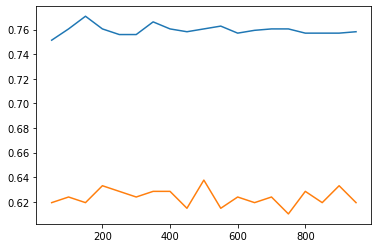

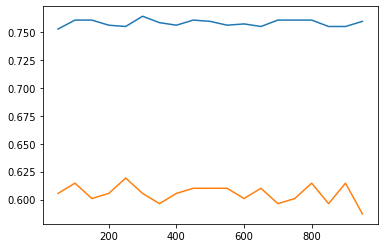

In [183]:
for fold in folds:
    X_train, X_test, y_train, y_test = X.iloc[fold[0], :], X.iloc[fold[1], :], y.iloc[fold[0]], y.iloc[fold[1]]
    
    acc = []
    acc_test = []
    for i in range(50,1000,50):
        rfc = RandomForestClassifier(i, max_leaf_nodes=32)
        rfc.fit(X_train, y_train)
        acc.append(accuracy_score(y_train, rfc.predict(X_train)))
        acc_test.append(accuracy_score(y_test, rfc.predict(X_test)))
    
    plt.figure()
    plt.plot(range(50,1000,50), acc)
    plt.plot(range(50,1000,50), acc_test)
    plt.show()

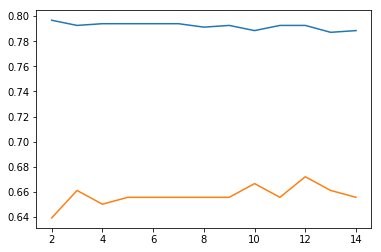

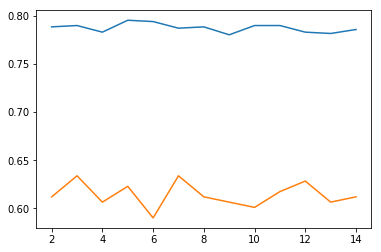

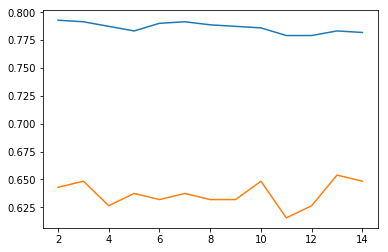

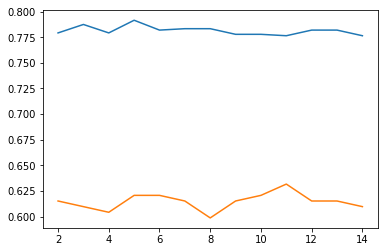

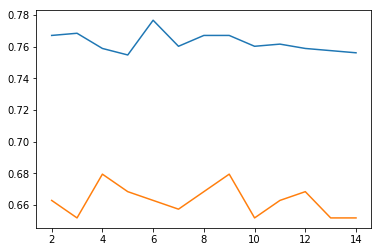

In [0]:
for fold in folds:
    X_train, X_test, y_train, y_test = X.iloc[fold[0], :], X.iloc[fold[1], :], y.iloc[fold[0]], y.iloc[fold[1]]
    
    acc = []
    acc_test = []
    for i in range(2,15):
        rfc = RandomForestClassifier(300, max_leaf_nodes=32, min_samples_split= i)
        rfc.fit(X_train, y_train)
        acc.append(accuracy_score(y_train, rfc.predict(X_train)))
        acc_test.append(accuracy_score(y_test, rfc.predict(X_test)))

    plt.figure()
    plt.plot(range(2,15), acc)
    plt.plot(range(2,15), acc_test)
    plt.show()

## Random Forest Regressor

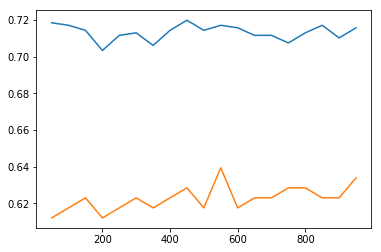

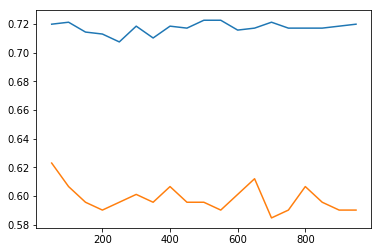

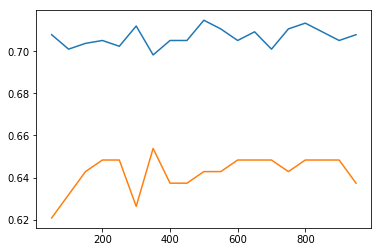

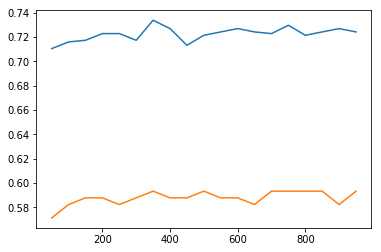

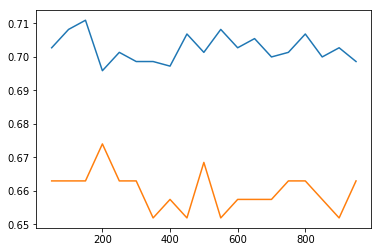

In [0]:
for fold in folds:
    X_train, X_test, y_train, y_test = X.iloc[fold[0], :], X.iloc[fold[1], :], y.iloc[fold[0]], y.iloc[fold[1]]
    
    acc = []
    acc_test = []
    for i in range(50,1000,50):
        rfr = RandomForestRegressor(i, max_leaf_nodes=32)
        rfr.fit(X_train, y_train)
        acc.append(accuracy_score(y_train, np.round(rfr.predict(X_train))))
        acc_test.append(accuracy_score(y_test, np.round(rfr.predict(X_test))))
    
    plt.figure()
    plt.plot(range(50,1000,50), acc)
    plt.plot(range(50,1000,50), acc_test)
    plt.show()

### With max_leaf_nodes = 300, Evaluating RF on max_depth

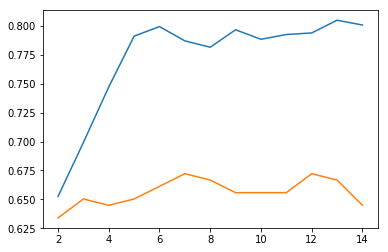

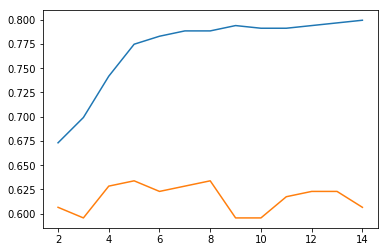

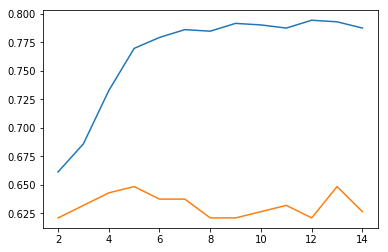

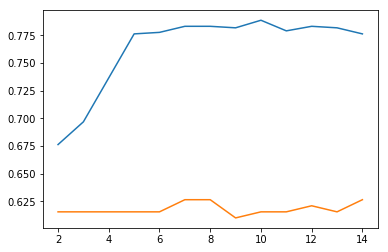

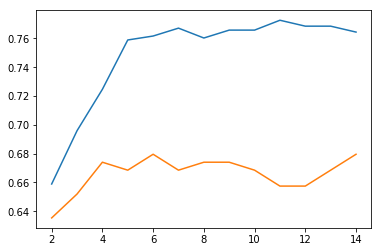

In [0]:
for fold in folds:
    X_train, X_test, y_train, y_test = X.iloc[fold[0], :], X.iloc[fold[1], :], y.iloc[fold[0]], y.iloc[fold[1]]
    
    acc = []
    acc_test = []
    for i in range(2,15):
        rfc = RandomForestClassifier(300, max_leaf_nodes=32, min_samples_split= 5, max_depth=i)
        rfc.fit(X_train, y_train)
        acc.append(accuracy_score(y_train, rfc.predict(X_train)))
        acc_test.append(accuracy_score(y_test, rfc.predict(X_test)))

    plt.figure()
    plt.plot(range(2,15), acc)
    plt.plot(range(2,15), acc_test)
    plt.show()

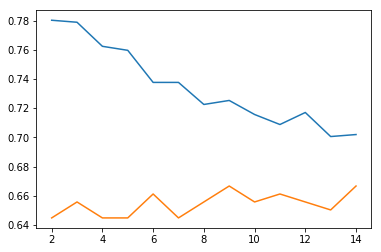

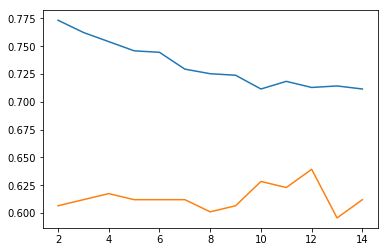

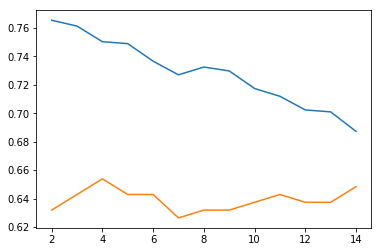

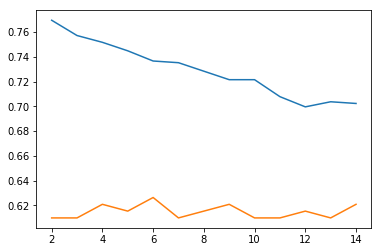

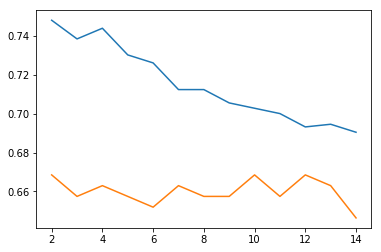

In [0]:
for fold in folds:
    X_train, X_test, y_train, y_test = X.iloc[fold[0], :], X.iloc[fold[1], :], y.iloc[fold[0]], y.iloc[fold[1]]
    
    acc = []
    acc_test = []
    for i in range(2,15):
        rfc = RandomForestClassifier(300, max_leaf_nodes=32, min_samples_split= 5, max_depth=5, min_samples_leaf=i)
        rfc.fit(X_train, y_train)
        acc.append(accuracy_score(y_train, rfc.predict(X_train)))
        acc_test.append(accuracy_score(y_test, rfc.predict(X_test)))

    plt.figure()
    plt.plot(range(2,15), acc)
    plt.plot(range(2,15), acc_test)
    plt.show()

In [0]:
def plot_confusion_matrix(cm, classes, normalize=False, title=' ', cmap=plt.cm.Blues):
    plt.figure(figsize = (10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        

    np.set_printoptions(2)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{0:.2f}".format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.savefig('Confusion_Matrix.png', format='png')


In [0]:
cm = confusion_matrix(y_true=np.array(y_test), y_pred=np.round(y_pred))

In [0]:
cm_plot_labels = [1,2,3,4,5]

Confusion matrix, without normalization


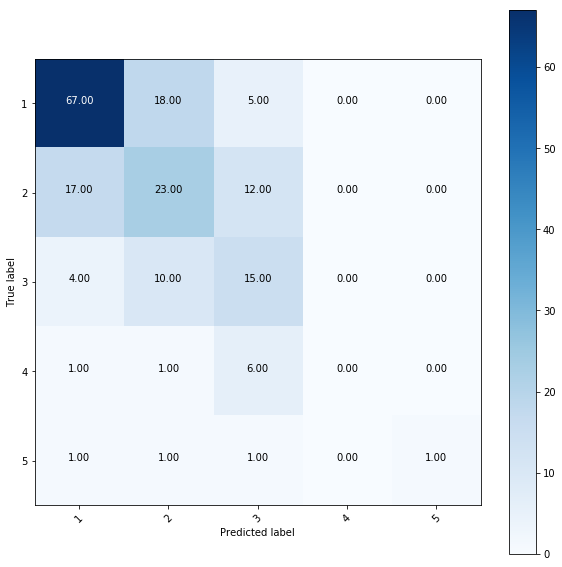

In [0]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title=' ')

In [0]:
accuracy_score(y_test, np.round(y_pred))

0.5792349726775956

In [0]:
accuracy_score(y_train, np.round(rf.predict(X_train)))

0.9793956043956044

In [0]:
accuracy_score(y_train, np.round(rf1.predict(X_train)))

0.7115384615384616

In [0]:
accuracy_score(y_test, np.round(y_pred1))

0.6174863387978142

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
knn = KNeighborsClassifier(25)

In [0]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=25, p=2,
           weights='uniform')

In [0]:
y_pred = knn.predict(X_test)

In [0]:
accuracy_score(y_test, y_pred)

0.5683060109289617

## Removing the Specialty and Group Columns

In [0]:
data1.head()

In [0]:
X = data1.iloc[:, 2:-1]

In [0]:
y = data1.iloc[:, -1]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1)

In [0]:
rfc = RandomForestClassifier(500)
rfr = RandomForestRegressor(500)
knn = KNeighborsClassifier(5)

In [0]:
rfc.fit(X_train, y_train)
rfr.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [0]:
y_pred_rfc = rfc.predict(X_test)
y_pred_rfr = rfr.predict(X_test)
y_pred_knn = knn.predict(X_test)

In [0]:
for c in [y_pred_rfc, np.round(y_pred_rfr), y_pred_knn]:
    print (accuracy_score(y_test, c))

0.5978260869565217
0.5760869565217391
0.5760869565217391


In [0]:
accuracy_score(y_train, rfc.predict(X_train))

1.0

In [0]:
dummy2 = pd.get_dummies(data1['Group'])

In [0]:
dataframe = pd.concat([dummy2,df], axis=1)

In [0]:
dataframe.head()

,A,B,C,D,E,F,G,H,Non_MD,Other,Primary_Care,Specialist,Surgical,physician,verysat,q1,q2,q3,q5,q6,q7,q9,q10,q11,q12,q13,q14,q16,q17,q18,q19,q20,q27,q34,q35,q37,q38,q45,q46,q47,q48,q50,q51,q53,q54,q55,q56,q57,q58
0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0.0,5.0,2.0,2.0,4.0,1.0,5.0,5.0,4.0,5.0,5.0,3.0,4.0,3.0,2.0,2.0,2.0,2.0,5.0,1.0,3.0,4.0,4.0,1.0,5.0,2.0,2.0,3.0,3.0,5.0,5.0,5.0,3.0,3.0,3.0
1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0.0,5.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,1.0,4.0,2.0,2.0,5.0,1.0,3.0,4.0,4.0,4.0,4.0,3.0,2.0,4.0,4.0,4.0,3.0,3.0,5.0,4.0,1.0,3.0,3.0,2.0
2,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0.0,5.0,5.0,4.0,4.0,4.0,3.0,5.0,4.0,4.0,5.0,3.0,5.0,4.0,4.0,5.0,3.0,3.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,4.0,4.0,2.0,3.0,2.0,3.0,3.0,5.0,3.0,2.0
3,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,5.0,5.0,5.0,1.0
4,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0.0,3.0,1.0,1.0,2.0,1.0,3.0,4.0,1.0,4.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,4.0,3.0,1.0,4.0,1.0,5.0,3.0,3.0,5.0,5.0,1.0,3.0,1.0,3.0


In [0]:
X, y = dataframe.iloc[:,:-1], dataframe.iloc[:,-1]

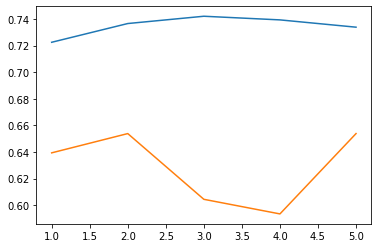

In [0]:
acc = []
acc_test = []

for fold in folds:
    X_train, X_test, y_train, y_test = X.iloc[fold[0], :], X.iloc[fold[1], :], y.iloc[fold[0]], y.iloc[fold[1]]
    
    rfc = RandomForestClassifier(300, max_leaf_nodes=32, min_samples_split= 5, max_depth=5, min_samples_leaf=2)
    rfc.fit(X_train, y_train)
    acc.append(accuracy_score(y_train, rfc.predict(X_train)))
    acc_test.append(accuracy_score(y_test, rfc.predict(X_test)))

plt.figure()
plt.plot(range(1,6), acc)
plt.plot(range(1,6), acc_test)
plt.show()

In [0]:
np.mean(acc_test)

0.6289677535579175

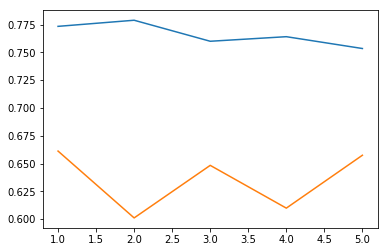

In [0]:
acc = []
acc_test = []

for fold in folds:
    X_train, X_test, y_train, y_test = X.iloc[fold[0], :], X.iloc[fold[1], :], y.iloc[fold[0]], y.iloc[fold[1]]
    
    rfc = RandomForestClassifier(300, max_leaf_nodes=32, min_samples_split= 5, max_depth=5, min_samples_leaf=2)
    rfc.fit(X_train, y_train)
    acc.append(accuracy_score(y_train, rfc.predict(X_train)))
    acc_test.append(accuracy_score(y_test, rfc.predict(X_test)))

plt.figure()
plt.plot(range(1,6), acc)
plt.plot(range(1,6), acc_test)
plt.show()

In [0]:
np.mean(acc_test)

0.6355990807489766

In [0]:
df2 = dataframe.drop(['q45' , 'q53', 'q54'], axis=1)

In [0]:
X, y = df2.iloc[:,:-1], df2.iloc[:,-1]

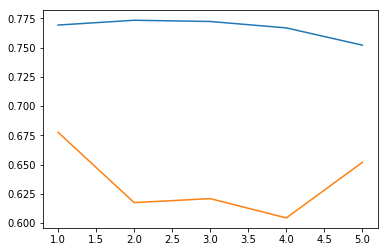

In [0]:
acc = []
acc_test = []

for fold in folds:
    X_train, X_test, y_train, y_test = X.iloc[fold[0], :], X.iloc[fold[1], :], y.iloc[fold[0]], y.iloc[fold[1]]
    
    rfc = RandomForestClassifier(500, max_leaf_nodes=32, min_samples_split= 5, max_depth=5, min_samples_leaf=2)
    rfc.fit(X_train, y_train)
    acc.append(accuracy_score(y_train, rfc.predict(X_train)))
    acc_test.append(accuracy_score(y_test, rfc.predict(X_test)))

plt.figure()
plt.plot(range(1,6), acc)
plt.plot(range(1,6), acc_test)
plt.show()

In [0]:
np.mean(acc_test)

0.6344580788290597

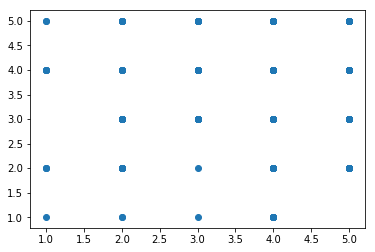

In [0]:
plt.figure()
plt.scatter(data.q1, data.q7)
plt.show()

In [0]:
dataframe.head()

,A,B,C,D,E,F,G,H,Non_MD,Other,Primary_Care,Specialist,Surgical,physician,verysat,q1,q2,q3,q5,q6,q7,q9,q10,q11,q12,q13,q14,q16,q17,q18,q19,q20,q27,q34,q35,q37,q38,q45,q46,q47,q48,q50,q51,q53,q54,q55,q56,q57,q58
0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0.0,5.0,2.0,2.0,4.0,1.0,5.0,5.0,4.0,5.0,5.0,3.0,4.0,3.0,2.0,2.0,2.0,2.0,5.0,1.0,3.0,4.0,4.0,1.0,5.0,2.0,2.0,3.0,3.0,5.0,5.0,5.0,3.0,3.0,3.0
1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0.0,5.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,1.0,4.0,2.0,2.0,5.0,1.0,3.0,4.0,4.0,4.0,4.0,3.0,2.0,4.0,4.0,4.0,3.0,3.0,5.0,4.0,1.0,3.0,3.0,2.0
2,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0.0,5.0,5.0,4.0,4.0,4.0,3.0,5.0,4.0,4.0,5.0,3.0,5.0,4.0,4.0,5.0,3.0,3.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,4.0,4.0,2.0,3.0,2.0,3.0,3.0,5.0,3.0,2.0
3,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,5.0,5.0,5.0,1.0
4,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0.0,3.0,1.0,1.0,2.0,1.0,3.0,4.0,1.0,4.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,4.0,3.0,1.0,4.0,1.0,5.0,3.0,3.0,5.0,5.0,1.0,3.0,1.0,3.0


In [0]:
from sklearn.impute import SimpleImputer

In [0]:
dataframe = pd.concat([dummy2,df], axis=1)
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(dataframe)
dataframe = imputer.transform(dataframe)

In [0]:
dataframe=pd.DataFrame(dataframe)

In [0]:
dataframe.isna().sum()

In [0]:
dataframe = np.round(dataframe)

In [0]:
X, y = dataframe.iloc[:, :-1], dataframe.iloc[:, -1]

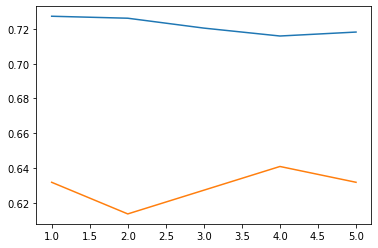

In [0]:
acc = []
acc_test = []

for fold in folds:
    X_train, X_test, y_train, y_test = X.iloc[fold[0], :], X.iloc[fold[1], :], y.iloc[fold[0]], y.iloc[fold[1]]
    
    rfc = RandomForestClassifier(300, max_leaf_nodes=32, min_samples_split= 5, max_depth=5, min_samples_leaf=2)
    rfc.fit(X_train, y_train)
    acc.append(accuracy_score(y_train, rfc.predict(X_train)))
    acc_test.append(accuracy_score(y_test, rfc.predict(X_test)))

plt.figure()
plt.plot(range(1,6), acc)
plt.plot(range(1,6), acc_test)
plt.show()

In [0]:
np.mean(acc_test)

0.6290909090909091

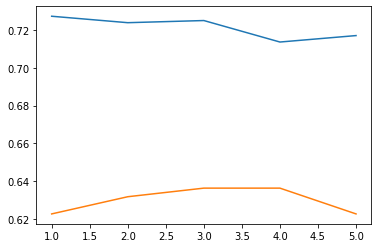

In [0]:
dataframe = pd.concat([dummy2,df], axis=1)

dataframe.dropna()
acc = []
acc_test = []

for fold in folds:
    X_train, X_test, y_train, y_test = X.iloc[fold[0], :], X.iloc[fold[1], :], y.iloc[fold[0]], y.iloc[fold[1]]
    
    rfc = RandomForestClassifier(300, max_leaf_nodes=32, min_samples_split= 5, max_depth=5, min_samples_leaf=2)
    rfc.fit(X_train, y_train)
    acc.append(accuracy_score(y_train, rfc.predict(X_train)))
    acc_test.append(accuracy_score(y_test, rfc.predict(X_test)))

plt.figure()
plt.plot(range(1,6), acc)
plt.plot(range(1,6), acc_test)
plt.show()

In [0]:
np.mean(acc_test)

0.6299999999999999

# Deep Learning

In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, ReLU, PReLU
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.initializers import glorot_uniform

In [0]:
y_train = pd.get_dummies(y_train).values
y_test = pd.get_dummies(y_test).values

In [181]:
model = Sequential()
model.add(Dense(8, activation='sigmoid', input_dim=53, kernel_initializer=glorot_uniform(seed=42)))
model.add(Dense(16, activation='sigmoid', kernel_initializer=glorot_uniform(seed=42)))
model.add(Dense(5, activation='softmax', kernel_initializer=glorot_uniform(seed=42)))

model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 8)                 432       
_________________________________________________________________
dense_64 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_65 (Dense)             (None, 5)                 85        
Total params: 661
Trainable params: 661
Non-trainable params: 0
_________________________________________________________________


In [182]:
# for i in range(5):  
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# mc = ModelCheckpoint('drive/My Drive/Colab Notebooks/dataset/model'+str(i)+'.h5', monitor='val_accuracy', save_best_only=True)
model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test)) #, callbacks=[mc])

Epoch 1/200
28/28 [==============================] - 0s 6ms/step - loss: 1.3254 - accuracy: 0.3337 - val_loss: 1.2851 - val_accuracy: 0.4795
Epoch 2/200
28/28 [==============================] - 0s 3ms/step - loss: 1.2538 - accuracy: 0.4736 - val_loss: 1.2385 - val_accuracy: 0.4703
Epoch 3/200
28/28 [==============================] - 0s 3ms/step - loss: 1.2121 - accuracy: 0.4725 - val_loss: 1.2116 - val_accuracy: 0.4703
Epoch 4/200
28/28 [==============================] - 0s 3ms/step - loss: 1.1830 - accuracy: 0.4725 - val_loss: 1.1876 - val_accuracy: 0.4703
Epoch 5/200
28/28 [==============================] - 0s 3ms/step - loss: 1.1538 - accuracy: 0.4725 - val_loss: 1.1646 - val_accuracy: 0.4703
Epoch 6/200
28/28 [==============================] - 0s 3ms/step - loss: 1.1330 - accuracy: 0.4725 - val_loss: 1.1437 - val_accuracy: 0.4703
Epoch 7/200
28/28 [==============================] - 0s 3ms/step - loss: 1.1121 - accuracy: 0.5034 - val_loss: 1.1253 - val_accuracy: 0.5160
Epoch 8/200
2

In [0]:
#64.38 (dropping the rows where q58 = NaN and imputing median values in other columns, dense = 32, 64, 5, activation = sigmoid)
#64.55 (imputing median values in other columns, dense = 32,64,5, activation = sigmoid)
#65.30 (dropping the rows where q58 = NaN and imputing median values in other columns, dense = 8,16,5, activation = sigmoid)
#65.30 (dropping the rows where q58 = NaN and imputing median values in other columns, dense = 8,8,5, activation = sigmoid)
#64.38 (dropping the rows where q58 = NaN and imputing median values in other columns, dense = 4,8,5, activation = sigmoid)
#63.01 (dropping the rows where q58 = NaN and imputing median values in other columns, dense = 6,10,5, activation = sigmoid)
#66.67 (dropping the rows where q58 = NaN and imputing median values in other columns, dense = 4,10,5, activation = sigmoid)
#64.55 (imputing median values in other columns, dense = 8,16,5, activation = sigmoid)
#62.27 (imputing median values in other columns, dense = 8,16,5, activation = relu)
#60.91 (imputing median values in other columns, dense = 8,16,5, activation = tanh)

#65.75 (dropping the rows where q58 = NaN and imputing median values in other columns, adding additional features, dense = 4,10,5, activation = sigmoid, adam)
#65.75 (dropping the rows where q58 = NaN and imputing median values in other columns, adding additional features, dense = 4,10,5, activation = sigmoid, rmsprop)

In [34]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
0,-0.317821,3.712097,-0.984072,-0.568522,-0.341346,4.445436,-0.261968,-0.715028,-0.182141,-0.22495,-0.650009,-0.405239,-0.178753,0.317821,-0.626874,0.688333,-1.115653,-1.456582,0.247477,-1.834240,0.851552,0.710235,0.328432,1.374924,0.954959,-1.543142,0.235888,-0.330321,-1.235799,-0.992110,-0.802569,-0.822095,0.768751,-1.820691,-0.89023,-0.167995,0.235286,-1.094973,1.181790,-1.861995,-2.488882,-0.753837,-1.002745,1.771767,1.863031,1.666206,-0.692828,-0.679207
1,-0.317821,3.712097,-0.984072,-0.568522,-0.341346,4.445436,-0.261968,-0.715028,-0.182141,-0.22495,-0.650009,-0.405239,-0.178753,0.317821,1.595216,0.688333,1.213595,1.100746,1.080680,1.375910,0.851552,0.710235,1.299256,1.374924,0.954959,0.745327,1.006278,1.124427,1.093344,1.288523,1.464731,1.554258,0.768751,1.295389,1.10535,0.950263,1.185143,-1.094973,1.181790,1.309215,1.015378,1.079764,1.158920,-1.468885,-1.476256,1.666206,1.334508,1.134786
2,-0.317821,-0.269390,1.016186,-0.568522,-0.341346,4.445436,-0.261968,-0.715028,-0.182141,-0.22495,-0.650009,-0.405239,-0.178753,0.317821,-0.626874,-1.898851,-1.892068,-2.309024,-1.418930,-1.834240,-1.194050,-0.818962,-2.584038,0.181955,-1.444823,-1.543142,-2.075283,-1.785070,-2.012180,-1.752321,-1.558335,-1.614212,-1.691252,-1.820691,-2.88581,-0.167995,-0.714572,-1.094973,0.036767,-2.919065,1.015378,-0.753837,-1.002745,1.771767,1.863031,-1.650990,-0.692828,-2.493200
3,-0.317821,-0.269390,1.016186,-0.568522,-0.341346,4.445436,-0.261968,-0.715028,-0.182141,-0.22495,-0.650009,-0.405239,-0.178753,0.317821,-0.626874,-0.605259,0.437179,-0.604139,0.247477,0.573372,-2.216851,0.710235,0.328432,0.181955,0.954959,-2.687377,-0.534503,-1.057695,-0.459418,-0.231899,-0.046802,-0.822095,-0.461251,-0.262651,0.10756,-1.286254,-1.664429,-1.094973,0.036767,0.252145,1.015378,0.162963,0.078088,0.961604,1.863031,0.836907,0.320840,-0.679207
4,-0.317821,-0.269390,1.016186,-0.568522,-0.341346,4.445436,-0.261968,-0.715028,-0.182141,-0.22495,-0.650009,-0.405239,-0.178753,0.317821,-0.626874,0.688333,1.213595,-0.604139,-1.418930,0.573372,0.851552,0.710235,1.299256,-1.011014,-0.244932,0.745327,-1.304893,-1.057695,-1.235799,-0.992110,-0.802569,-0.822095,-0.461251,0.516369,0.10756,-1.286254,-1.664429,2.174946,-1.108257,0.252145,-0.152709,0.162963,0.078088,-0.658722,1.028209,-0.821691,-0.692828,-0.679207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,-0.317821,-0.269390,-0.984072,1.758948,-0.341346,-0.224950,-0.261968,-0.715028,-0.182141,-0.22495,-0.650009,-0.405239,5.594309,0.317821,1.595216,0.688333,1.213595,1.100746,1.080680,1.375910,-0.171249,0.710235,1.299256,0.181955,0.954959,-0.398908,0.235888,-0.330321,0.316963,0.528312,0.708964,0.762141,-0.461251,1.295389,1.10535,-0.167995,0.235286,-0.005000,0.036767,0.252145,-0.152709,0.162963,0.078088,-0.658722,-0.641434,0.836907,0.320840,1.134786
868,-0.317821,-0.269390,-0.984072,1.758948,-0.341346,-0.224950,-0.261968,-0.715028,-0.182141,-0.22495,-0.650009,-0.405239,5.594309,0.317821,-0.626874,0.688333,1.213595,-0.604139,1.080680,1.375910,0.851552,0.710235,1.299256,0.181955,0.954959,0.745327,1.006278,1.124427,1.093344,1.288523,1.464731,1.554258,0.768751,0.516369,0.10756,0.950263,0.235286,-0.005000,-1.108257,1.309215,1.015378,1.079764,1.158920,-0.658722,-0.641434,0.836907,1.334508,-0.679207
869,-0.317821,-0.269390,-0.984072,1.758948,-0.341346,-0.224950,-0.261968,-0.715028,-0.182141,-0.22495,-0.650009,-0.405239,5.594309,0.317821,1.595216,-0.605259,1.213595,1.100746,1.080680,1.375910,0.851552,0.710235,0.328432,0.181955,-0.244932,0.745327,1.006278,1.124427,1.093344,1.288523,0.708964,0.762141,0.768751,1.295389,1.10535,0.950263,1.185143,-1.094973,1.181790,1.309215,1.015378,1.079764,1.158920,-0.658722,-1.476256,1.666206,1.334508,1.134786
870,-0.31

In [0]:
i=0
model.add(Dense(8, activation='relu', input_dim=48))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# mc = ModelCheckpoint('drive/My Drive/Colab Notebooks/dataset/model'+str(i)+'.h5', monitor='val_accuracy', save_best_only=True)
model.fit(X_train[i], y_train[i], epochs=100, validation_data=(X_test[i], y_test[i]))

In [0]:
model = Sequential()
model.add(Dense(8, activation='relu', input_dim=48))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Generate dummy data
import numpy as np
data = X_train
# labels = np.random.randint(10, size=(1000, 1))

# Convert labels to categorical one-hot encoding
one_hot_labels = y_train 

# Train the model, iterating on the data in batches of 32 samples
model.fit(data, one_hot_labels, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
23/23 [==============================] - 0s 8ms/step - loss: 1.2708 - accuracy: 0.4335 - val_loss: 1.1781 - val_accuracy: 0.4945
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 1.1612 - accuracy: 0.4911 - val_loss: 1.1429 - val_accuracy: 0.5110
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 1.1321 - accuracy: 0.4979 - val_loss: 1.1230 - val_accuracy: 0.5220
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 1.1196 - accuracy: 0.5048 - val_loss: 1.1014 - val_accuracy: 0.4890
Epoch 5/100
23/23 [==============================] - 0s 4ms/step - loss: 1.1035 - accuracy: 0.5062 - val_loss: 1.0870 - val_accuracy: 0.4945
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 1.0830 - accuracy: 0.5350 - val_loss: 1.0912 - val_accuracy: 0.5165
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 1.0783 - accuracy: 0.5281 - val_loss: 1.0635 - val_accuracy: 0.5220
Epoch 8/100
2

In [0]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 8)                 392       
_________________________________________________________________
dense_53 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_54 (Dense)             (None, 5)                 85        
Total params: 621
Trainable params: 621
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(data, one_hot_labels, epochs=1000, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.8561 - accuracy: 0.6392 - val_loss: 0.9070 - val_accuracy: 0.6319
Epoch 2/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.8511 - accuracy: 0.6461 - val_loss: 0.8746 - val_accuracy: 0.6484
Epoch 3/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.8555 - accuracy: 0.6365 - val_loss: 0.8738 - val_accuracy: 0.6758
Epoch 4/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.8558 - accuracy: 0.6420 - val_loss: 0.8780 - val_accuracy: 0.6758
Epoch 5/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.8508 - accuracy: 0.6392 - val_loss: 0.9246 - val_accuracy: 0.5989
Epoch 6/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.8564 - accuracy: 0.6433 - val_loss: 0.8726 - val_accuracy: 0.6593
Epoch 7/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.8562 - accuracy: 0.6433 - val_loss: 0.8741 - val_accuracy: 0.6703
Epoch 

KeyboardInterrupt: ignored

23/23 [==============================] - 0s 4ms/step - loss: 0.5867 - accuracy: 0.7737 - val_loss: 1.2714 - val_accuracy: 0.5934
Epoch 687/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5953 - accuracy: 0.7517 - val_loss: 1.2651 - val_accuracy: 0.5934
Epoch 688/1000
 1/23 [>.............................] - ETA: 0s - loss: 0.7686 - accuracy: 0.6875

Exception ignored in: 'pandas._libs.lib.c_is_list_like'
Traceback (most recent call last):
  File "/usr/lib/python3.6/abc.py", line 189, in __instancecheck__
    ABCMeta._abc_invalidation_counter and
KeyboardInterrupt


23/23 [==============================] - 0s 4ms/step - loss: 0.5972 - accuracy: 0.7627 - val_loss: 1.2566 - val_accuracy: 0.5879
Epoch 689/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5932 - accuracy: 0.7709 - val_loss: 1.2709 - val_accuracy: 0.6099
Epoch 690/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5913 - accuracy: 0.7599 - val_loss: 1.3180 - val_accuracy: 0.6044
Epoch 691/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.6069 - accuracy: 0.7449 - val_loss: 1.2601 - val_accuracy: 0.6099
Epoch 692/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5882 - accuracy: 0.7641 - val_loss: 1.2612 - val_accuracy: 0.6154
Epoch 693/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5944 - accuracy: 0.7599 - val_loss: 1.2175 - val_accuracy: 0.6099
Epoch 694/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.5993 - accuracy: 0.7517 - val_loss: 1.2487 - val_accuracy: 0.5659
Epoch 6

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
model = Sequential()
model.add(Conv1D(16, 20, input_shape = (48,1)))
model.add(Conv1D(32, 20))
model.add(Flatten())
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Generate dummy data
import numpy as np
data = np.expand_dims(X_train, axis=2)
# labels = np.random.randint(10, size=(1000, 1))

# Convert labels to categorical one-hot encoding
one_hot_labels = y_train 

# Train the model, iterating on the data in batches of 32 samples
model.fit(data, one_hot_labels, epochs=100, batch_size=32, validation_data=(np.expand_dims(X_test, axis=2), y_test))

Epoch 1/100
23/23 [==============================] - 0s 10ms/step - loss: 1.4370 - accuracy: 0.4527 - val_loss: 1.2103 - val_accuracy: 0.5000
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 1.1221 - accuracy: 0.5418 - val_loss: 1.1523 - val_accuracy: 0.5110
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 1.0831 - accuracy: 0.5240 - val_loss: 1.0507 - val_accuracy: 0.5659
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 1.0331 - accuracy: 0.5693 - val_loss: 1.0049 - val_accuracy: 0.5659
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 1.0178 - accuracy: 0.5734 - val_loss: 1.0092 - val_accuracy: 0.6044
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 0.9959 - accuracy: 0.5802 - val_loss: 0.9769 - val_accuracy: 0.5879
Epoch 7/100
23/23 [==============================] - 0s 6ms/step - loss: 0.9760 - accuracy: 0.5885 - val_loss: 0.9767 - val_accuracy: 0.5989
Epoch 8/100


In [0]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 29, 16)            336       
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 10, 32)            10272     
_________________________________________________________________
flatten_1 (Flatten)          (None, 320)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 5)                 1605      
Total params: 12,213
Trainable params: 12,213
Non-trainable params: 0
_________________________________________________________________


In [0]:
data.shape

(729, 48, 1)

# Multi Variate Gaussian

In [0]:
X_train = pd.DataFrame(X_train, columns=df.columns[:-1])
X_test = pd.DataFrame(X_test, columns=df.columns[:-1])

In [0]:
X1_mean = X_train.iloc[np.where(y_train==1)].describe().iloc[1, :]
X1_std = X_train.iloc[np.where(y_train==1)].describe().iloc[2, :]

X2_mean = X_train.iloc[np.where(y_train==2)].describe().iloc[1, :]
X2_std = X_train.iloc[np.where(y_train==2)].describe().iloc[2, :]

X3_mean = X_train.iloc[np.where(y_train==3)].describe().iloc[1, :]
X3_std = X_train.iloc[np.where(y_train==3)].describe().iloc[2, :]

X4_mean = X_train.iloc[np.where(y_train==4)].describe().iloc[1, :]
X4_std = X_train.iloc[np.where(y_train==4)].describe().iloc[2, :]

X5_mean = X_train.iloc[np.where(y_train==5)].describe().iloc[1, :]
X5_std = X_train.iloc[np.where(y_train==5)].describe().iloc[2, :]

In [0]:
from scipy.stats import norm
# def norm(x, mean, std):
#     variance = float(std)**2
#     denom = (2*math.pi*variance)**.5
#     numer = math.exp(-(float(x)-float(mean))**2/(2*variance))
#     return numer/denom

In [101]:
p1 = 1
for i in range(len(X1_mean)):
  p1 = p1 * norm.pdf( X_train.iloc[np.where(y_train==1)].iloc[:,i].values, X1_mean[i], X1_std[i])

p2 = 1
for i in range(len(X2_mean)):
  p2 = p2 * norm.pdf( X_train.iloc[np.where(y_train==2)].iloc[:,i].values, X2_mean[i], X2_std[i])

p3 = 1
for i in range(len(X3_mean)):
  p3 = p3 * norm.pdf( X_train.iloc[np.where(y_train==3)].iloc[:,i].values, X3_mean[i], X3_std[i])

p4 = 1
for i in range(len(X4_mean)):
  p4 = p4 * norm.pdf( X_train.iloc[np.where(y_train==4)].iloc[:,i].values, X4_mean[i], X4_std[i])

p5 = 1
for i in range(len(X5_mean)):
  p5 = p5 * norm.pdf( X_train.iloc[np.where(y_train==5)].iloc[:,i].values, X5_mean[i], X5_std[i])

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1740: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)


In [0]:
p1_test = 1
for i in range(len(X1_mean)):
  p1_test = p1_test * norm.pdf( X_test.iloc[np.where(y_test==1)].iloc[:,i].values, X1_mean[i], X1_std[i])

p2_test = 1
for i in range(len(X2_mean)):
  p2_test = p2_test * norm.pdf( X_test.iloc[np.where(y_test==2)].iloc[:,i].values, X2_mean[i], X2_std[i])

p3_test = 1
for i in range(len(X3_mean)):
  p3_test = p3_test * norm.pdf( X_test.iloc[np.where(y_test==3)].iloc[:,i].values, X3_mean[i], X3_std[i])

p4_test = 1
for i in range(len(X4_mean)):
  p4_test = p4_test * norm.pdf( X_test.iloc[np.where(y_test==4)].iloc[:,i].values, X4_mean[i], X4_std[i])

p5_test = 1
for i in range(len(X5_mean)):
  p5_test = p5_test * norm.pdf( X_test.iloc[np.where(y_test==5)].iloc[:,i].values, X5_mean[i], X5_std[i])

In [103]:
print (min(p1), max(p1))

9.577042402386758e-90 8.350442996643873e-26


In [0]:
df1 = X_train.iloc[np.where(y_train==1)]
df1['p'] = p1
df2 = X_train.iloc[np.where(y_train==2)]
df2['p'] = p2
df3 = X_train.iloc[np.where(y_train==3)]
df3['p'] = p3
df4 = X_train.iloc[np.where(y_train==4)]
df4['p'] = p4
df5 = X_train.iloc[np.where(y_train==5)]
df5['p'] = p5

In [0]:
X_train_modified = pd.concat((df1,df2,df3, df4, df5))

In [0]:
df1_test = X_test.iloc[np.where(y_test==1)]
df1_test['p'] = p1_test
df2_test = X_test.iloc[np.where(y_test==2)]
df2_test['p'] = p2_test
df3_test = X_test.iloc[np.where(y_test==3)]
df3_test['p'] = p3_test
df4_test = X_test.iloc[np.where(y_test==4)]
df4_test['p'] = p4_test
df5_test = X_test.iloc[np.where(y_test==5)]
df5_test['p'] = p5_test

In [0]:
X_test_modified = pd.concat((df1_test,df2_test,df3_test, df4_test, df5_test))

(array([397.,   6.,   5.,   3.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([9.5770424e-90, 8.3504430e-27, 1.6700886e-26, 2.5051329e-26,
        3.3401772e-26, 4.1752215e-26, 5.0102658e-26, 5.8453101e-26,
        6.6803544e-26, 7.5153987e-26, 8.3504430e-26]),
 <a list of 10 Patch objects>)

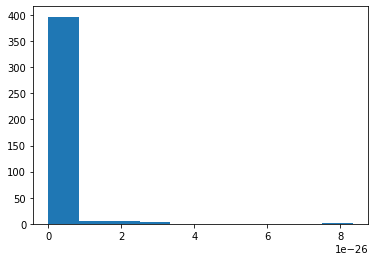

In [108]:
plt.hist(p1)

In [0]:
plt.hist(p1_test)

In [0]:
plt.hist(p2)

(array([57.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([7.51542187e-52, 5.88101781e-29, 1.17620356e-28, 1.76430534e-28,
        2.35240712e-28, 2.94050890e-28, 3.52861068e-28, 4.11671246e-28,
        4.70481424e-28, 5.29291603e-28, 5.88101781e-28]),
 <a list of 10 Patch objects>)

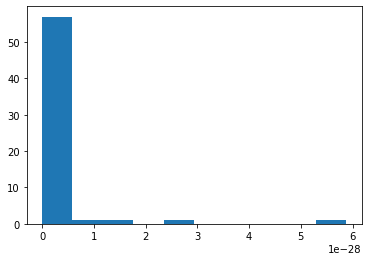

In [138]:
plt.hist(p2_test)

In [0]:
plt.hist(p3)

In [0]:
plt.hist(p3_test)

In [0]:
plt.hist(p4)

In [0]:
plt.hist(p4_test)

In [0]:
plt.hist(p5)

In [0]:
plt.hist(p5_test)

In [0]:
X_train_modified.fillna(0, inplace=True)

In [0]:
X_test_modified.fillna(0, inplace=True)

In [0]:
scaler = StandardScaler()
X_train_modified = scaler.fit_transform(X_train_modified)
X_train_modified = scaler.transform(X_test_modified)

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
rf = RandomForestClassifier(10)
rf.fit(X_train_modified, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
acc = accuracy_score(y_test, rf.predict(X_test_modified))

In [124]:
acc

0.4063926940639269

In [125]:
rf.predict(df_test)

array([3., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 3., 3., 3., 3., 3., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 3., 3., 3., 3., 3., 3., 3., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 3., 3., 3., 3., 3.,
       3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 3., 3.,
       3., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [0]:
from sklearn.neighbors import KNeighborsClassifier 

In [0]:
acc = []
for i in range (5,16):
  knn = KNeighborsClassifier(i)
  knn.fit(X_train, y_train)
  acc.append(accuracy_score(y_test,knn.predict(X_test)))

In [135]:
X_train.shape

(872, 53)

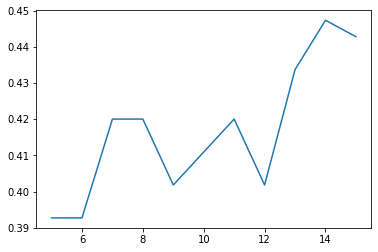

In [132]:
plt.plot(range(5,16), acc)

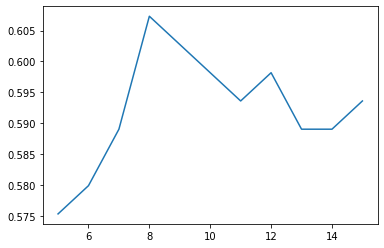

In [137]:
plt.plot(range(5,16), acc)

(array([72.,  4.,  1.,  2.,  5.,  1.,  0.,  0.,  1.,  0.]),
 array([1.e-90, 1.e-41, 2.e-41, 3.e-41, 4.e-41, 5.e-41, 6.e-41, 7.e-41,
        8.e-41, 9.e-41, 1.e-40]),
 <a list of 10 Patch objects>)

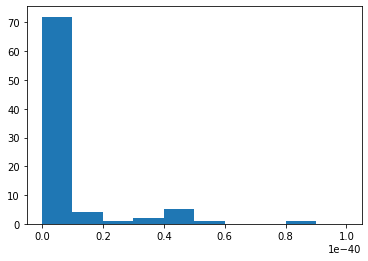

In [153]:
plt.hist(X_train_modified.iloc[:, -1], range=[1e-90,1e-40])